In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import pandas as pd
from functions import corrMatrix
from wordEmbedders import WESCScore
import pickle
from re import sub
from latexTable import LatexTable
import matplotlib.pyplot as plt

In [2]:
finalNames = pickle.load(open('./FinalNames.pickle', mode='rb'))
datasets = finalNames['datasets'].keys()
dimensions = finalNames['dimensions']

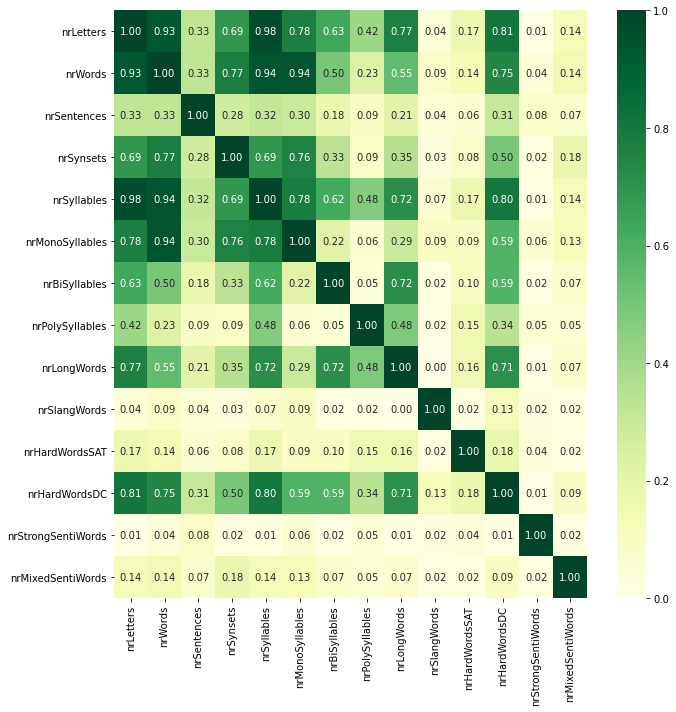

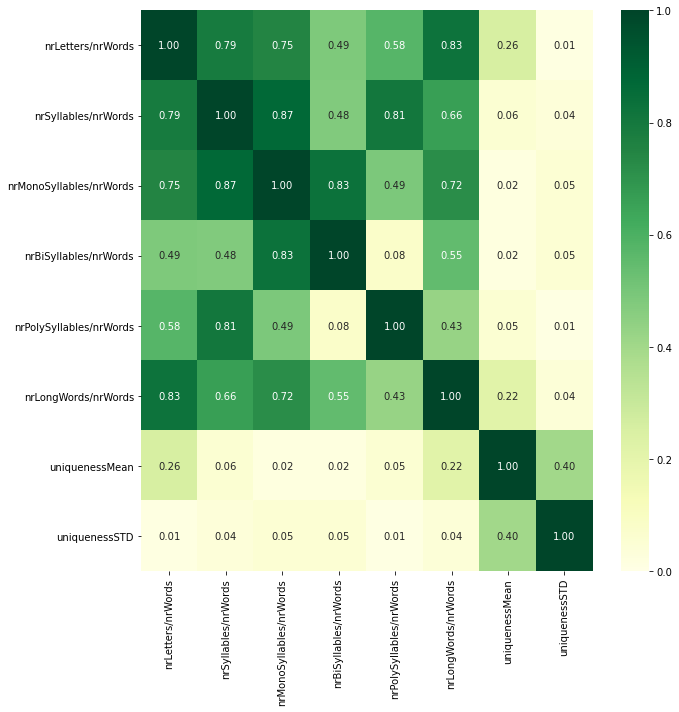

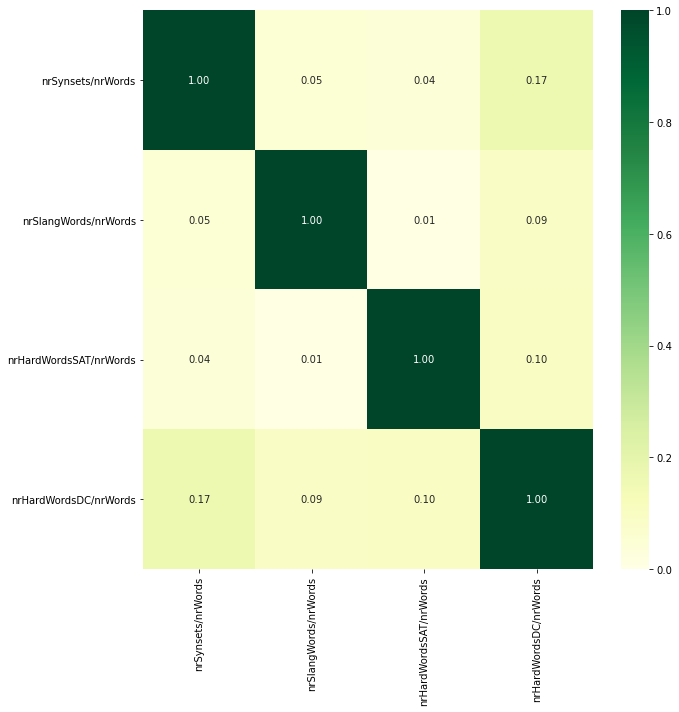

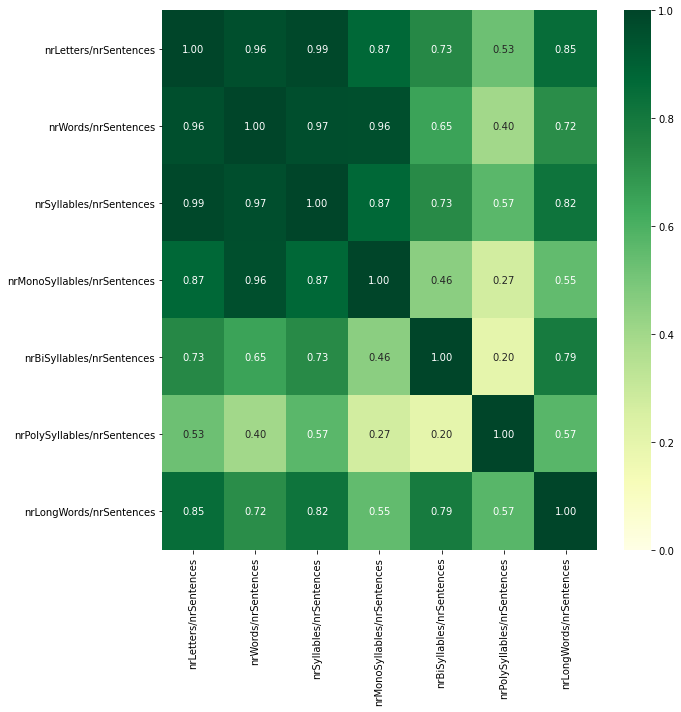

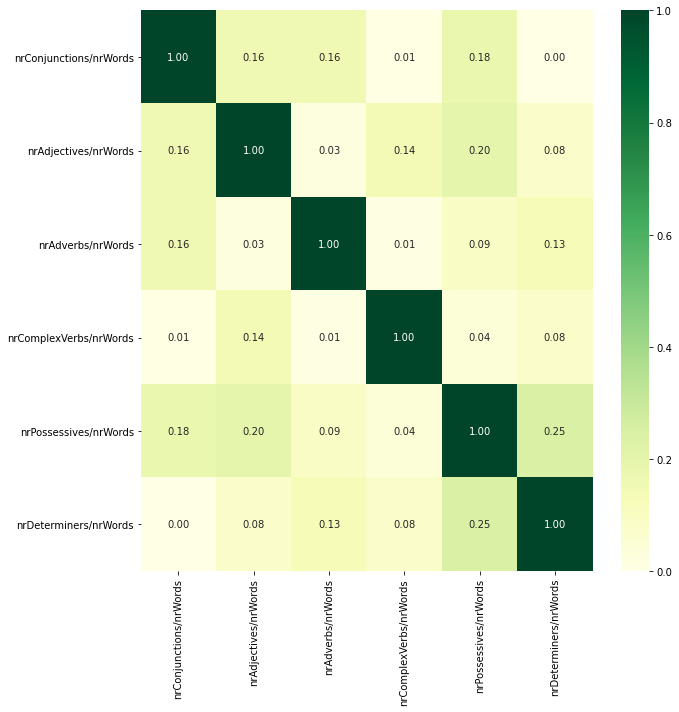

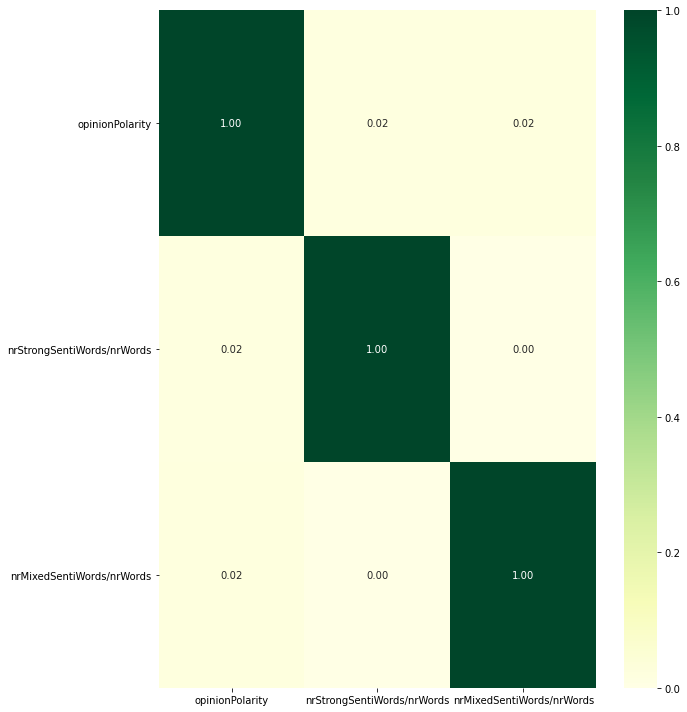

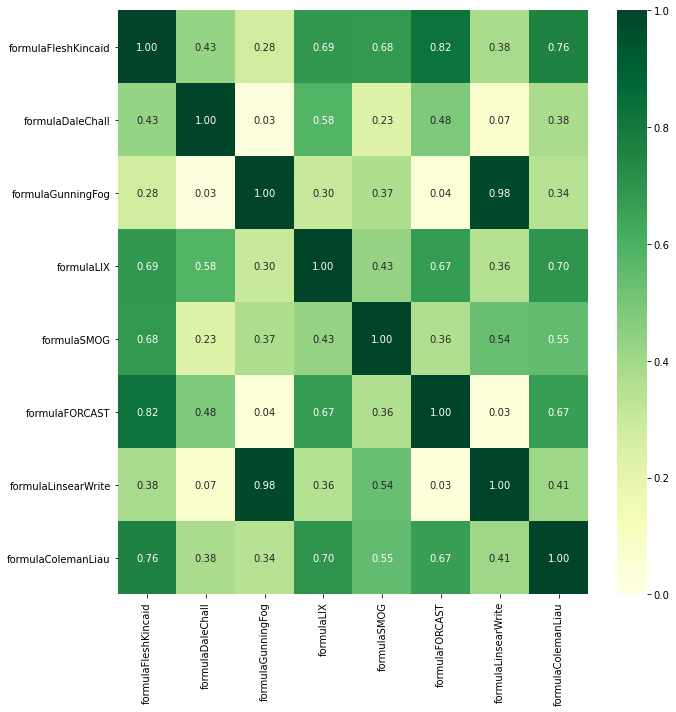

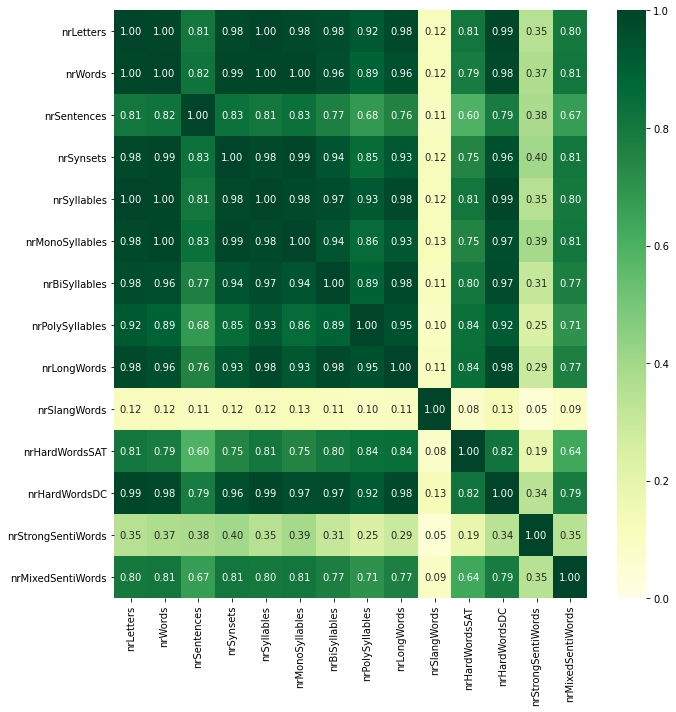

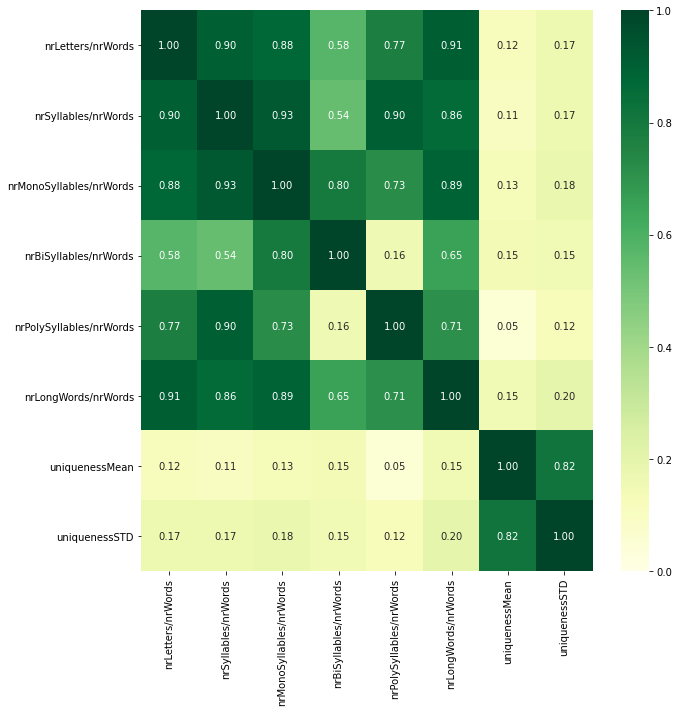

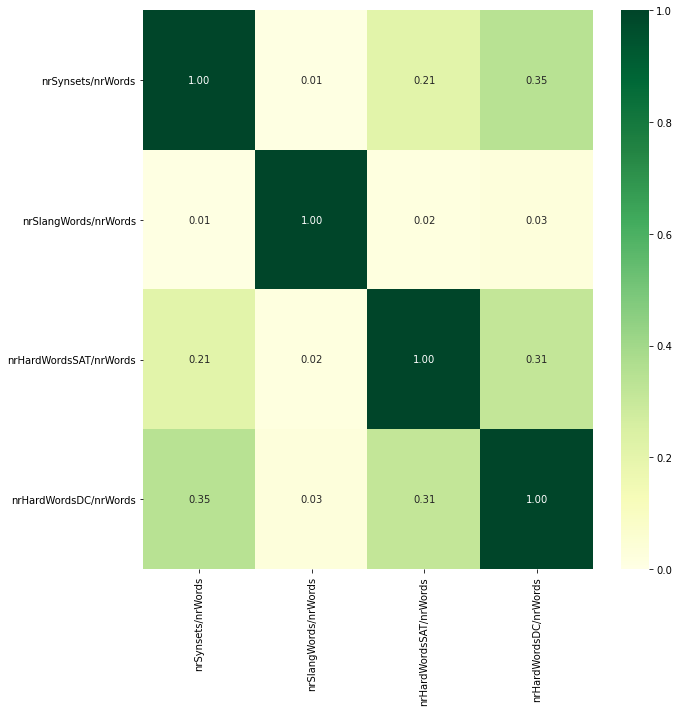

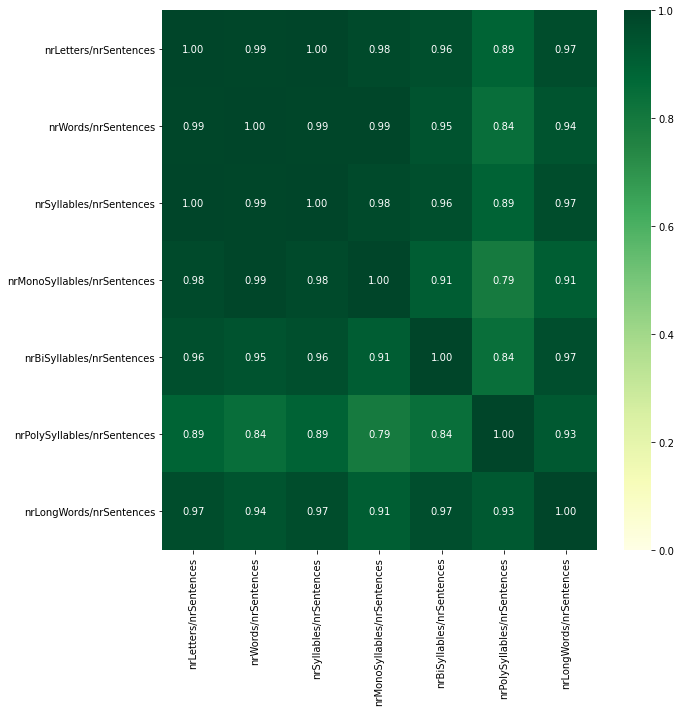

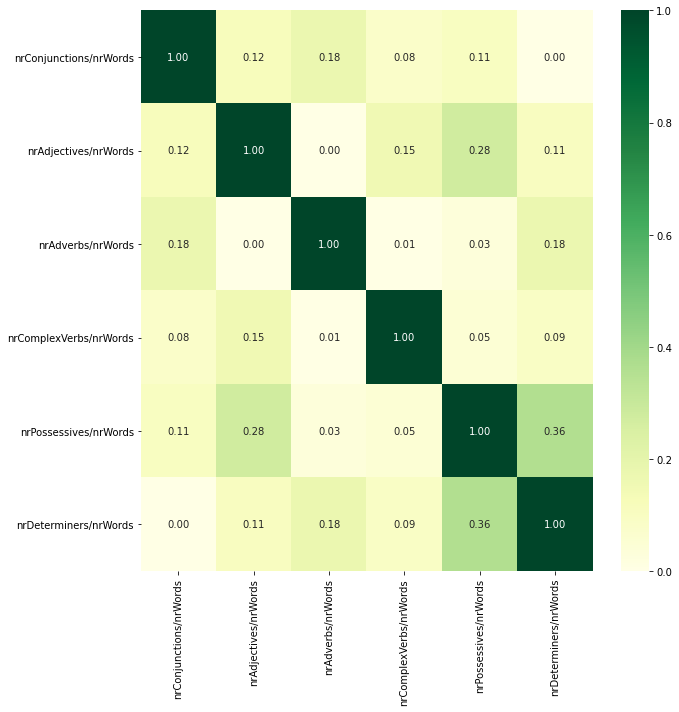

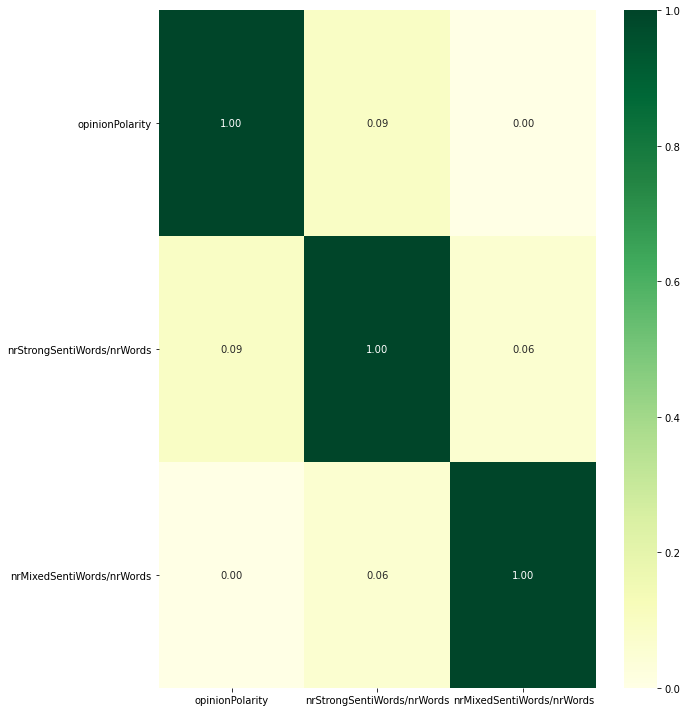

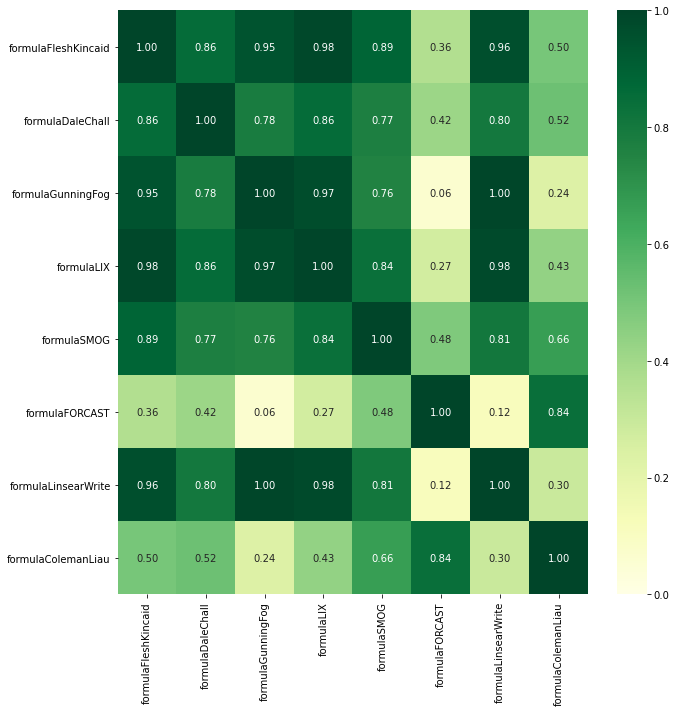

In [3]:
for dataset in datasets:
    dimsFile = f"../data/{dataset}/Dimensions.csv"
    dims = pd.read_csv(dimsFile)
    for aspect in [x for x in dimensions.keys() if not x == 'postag']:
        columns = dimensions[aspect]
        columnNames = list(map(finalNames['dimensionNames'].get, columns))
        d = dims[columns]
        d.columns = columnNames
        matrix = corrMatrix(d)
        fig = matrix.get_figure()
        fig.patch.set_alpha(1)
        plt.yticks(rotation=0) 
        plt.tight_layout()
        fig.savefig(f'./Appendix-Correlations/{dataset}-{aspect}')